In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip archive.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [ ]:
input_path = []
label = []

for class_name in os.listdir("test"):
    for path in os.listdir("test/" + class_name):
        if class_name == 'unripe':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("test", class_name, path))
print(input_path[0], label[0])


FileNotFoundError: ignored

In [ ]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

In [ ]:
# for i in df['images']:
#     if '.jpg' not in i:
#         print(i)

test/ripe/th (11).jpeg
test/ripe/th (4).jpeg
test/unripe/th (23).jpeg
test/unripe/th (13).jpeg
test/unripe/th (5).jpeg
test/unripe/th (14).jpeg
test/ripe/img_231.jpeg
test/unripe/th (17).jpeg
test/ripe/img_81.jpeg
test/ripe/th (9).jpeg
test/unripe/th (11).jpeg
test/unripe/th (20).jpeg
test/ripe/th (12).jpeg
test/unripe/img_421.jpeg
test/unripe/th (26).jpeg
test/ripe/th (3).jpeg
test/ripe/img_361.jpeg
test/unripe/th (4).jpeg
test/unripe/th (29).jpeg
test/unripe/th (10).jpeg
test/unripe/th (12).jpeg
test/ripe/th (5).jpeg
test/unripe/th (6).jpeg
test/unripe/th (16).jpeg
test/ripe/th (6).jpeg
test/unripe/th (24).jpeg
test/ripe/gg.jpeg
test/ripe/img_441.jpeg
test/unripe/th (8).jpeg
test/unripe/th (27).jpeg
test/ripe/th (7).jpeg
test/ripe/th (1).jpeg
test/unripe/th (7).jpeg
test/ripe/th (8).jpeg
test/ripe/th (2).jpeg
test/ripe/er.jpeg
test/unripe/th (28).jpeg
test/unripe/th (21).jpeg
test/unripe/th (25).jpeg
test/unripe/img_181.jpeg
test/unripe/th (3).jpeg
test/unripe/th (18).jpeg
test/ripe/

In [ ]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('unripe')
    plt.axis('off')

In [ ]:
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('ripe')
    plt.axis('off')

In [ ]:
import seaborn as sns
sns.countplot(df['label'])

In [ ]:
df['label'] = df['label'].astype('str')

NameError: ignored

In [ ]:
df.head()

NameError: ignored

In [ ]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 43 validated image filenames belonging to 2 classes.
Found 11 validated image filenames belonging to 2 classes.


In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [ ]:

history = model.fit(train_iterator, epochs=5, validation_data=val_iterator)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.7118 - accuracy: 0.3721 - val_loss: 4.3343 - val_accuracy: 0.4545
Epoch 2/5
1/1 [==============================] - 1s 936ms/step - loss: 2.8081 - accuracy: 0.6279 - val_loss: 1.3649 - val_accuracy: 0.4545
Epoch 3/5
1/1 [==============================] - 1s 875ms/step - loss: 0.9217 - accuracy: 0.6279 - val_loss: 0.7047 - val_accuracy: 0.5455
Epoch 4/5
1/1 [==============================] - 1s 892ms/step - loss: 0.8212 - accuracy: 0.3721 - val_loss: 0.7222 - val_accuracy: 0.5455
Epoch 5/5
1/1 [==============================] - 1s 909ms/step - loss: 0.8462 - accuracy: 0.3721 - val_loss: 0.6862 - val_accuracy: 0.5455


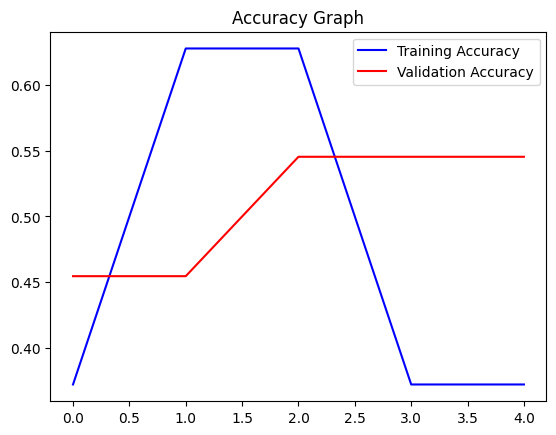

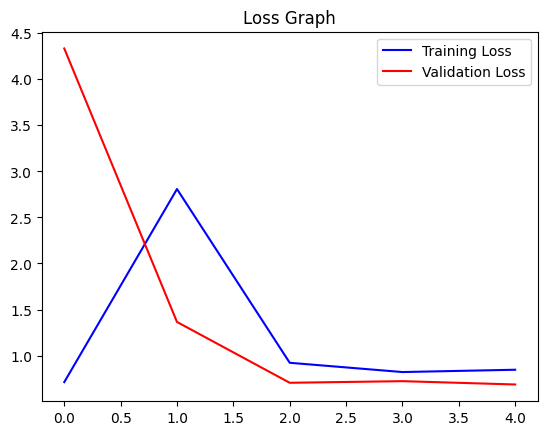

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
image_path = "predict/img_11.jpeg" # path of the image
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0 # normalize the image
img = img.reshape(1, 128, 128, 3) # reshape for prediction
pred = model.predict(img)
if pred[0] > 0.5:
    label = 'unripe'
else:
    label = 'ripe'
print(label)

1/1 [==============================] - 0s 117ms/step
unripe
